1.1
====

<div style="width:600px">
Implement a three-armed bandit, as introduced in the lecture.

The first arm shall sample its reward uniformly from the interval [1,2).
                                                                   
The second arm shall sample its reward uniformly from the interval
[0,3).
 
The third arm shall sample its reward uniformly from the interval [1,4).
                                                                   
Compute the average reward when sampling 1000 actions uniformly.
</div>

In [21]:
def sample_reward(action):
    if action == 0:
        return np.random.uniform(1, 2)
    elif action == 1:
        return np.random.uniform(0, 3)
    else:
        return np.random.uniform(1, 4)

rewards = []
for i in range(1000):
    action = np.random.randint(3)
    reward = sample_reward(action)
    rewards.append(reward)

In [22]:
np.mean(rewards)

1.8142856954393947

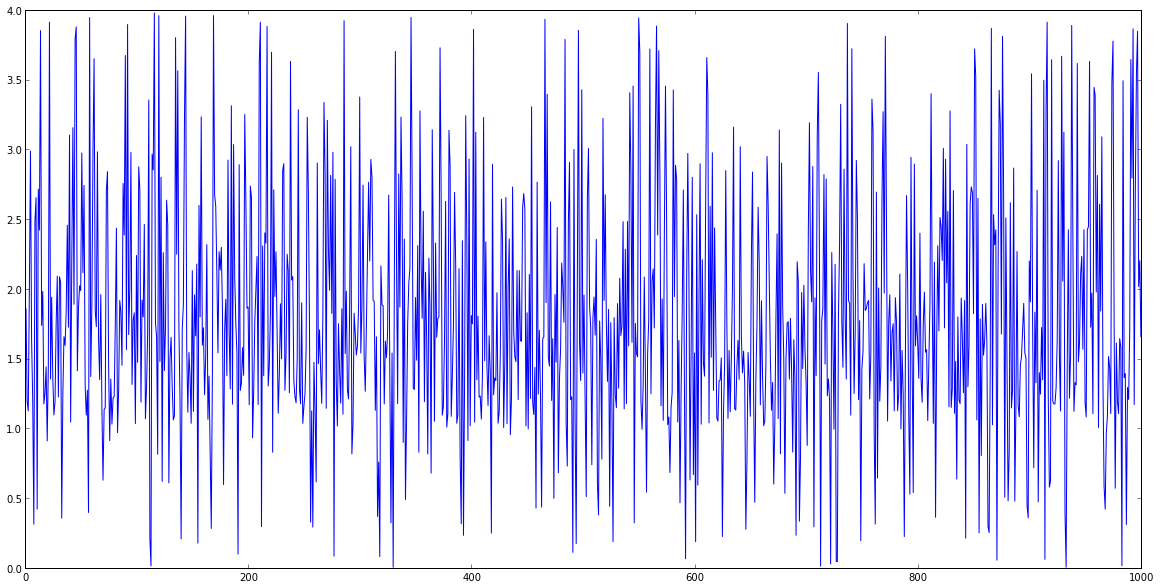

In [23]:
plt.figsize(20, 10)
plt.plot(rewards)

1.81428569544


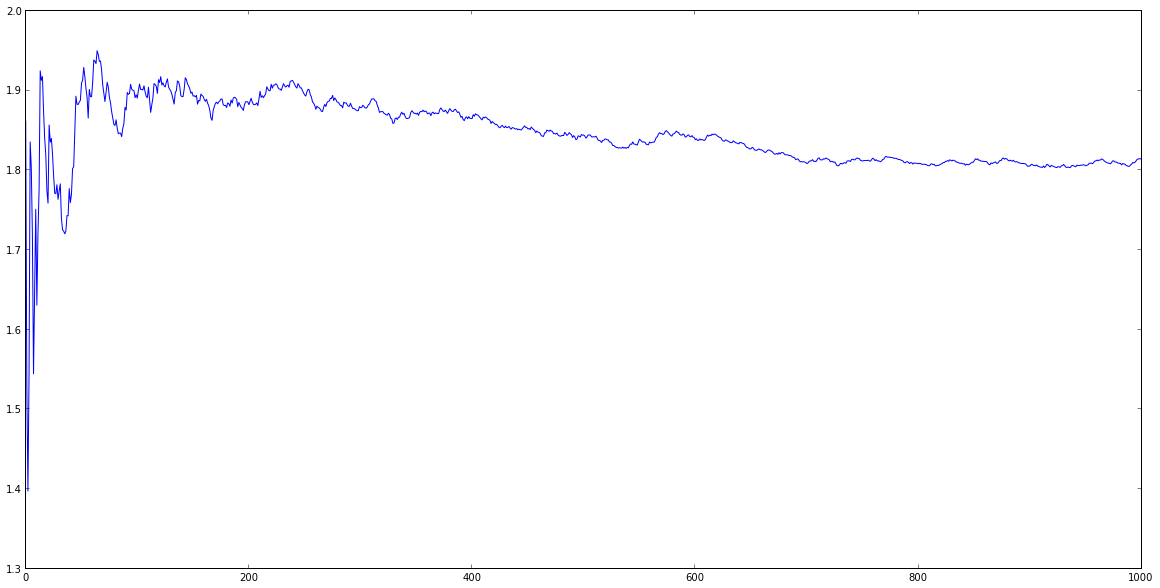

In [24]:
def cum_mean(values):
    return np.cumsum(values) / np.arange(1, len(values) + 1, dtype=np.float)

plt.plot(cum_mean(rewards))
print(np.mean(rewards))

1.2
=====

<div style="width:600px">Initialize Q(ai)=0 and chose 1000 actions according to an ε-greedy selec-
tion strategy (ε =0.1). Update your action values by computing the sam-
ple average reward of each action recursively.
For every 100 actions show the percentage of choosing arm 1, arm 2,
and arm 3.</div>


In [25]:
epsilon = 0.1
Q = np.zeros(6)
counts = np.zeros(6)
R, A = [], []
Qs = np.empty((1000, 6))
for i in range(1000):
    if np.random.uniform() < epsilon:
        # sample uniformly
        A = np.random.randint(6)
    else:
        # take optimum action
        A = np.argmax(Q)
    reward = sample_reward(action)
    counts[action] += 1
    Q[action] = Q[action] + 1.0 / (counts[action]) * (reward - Q[action])
    Qs[i, :] = Q
    rewards.append(reward)
    actions.append(action)

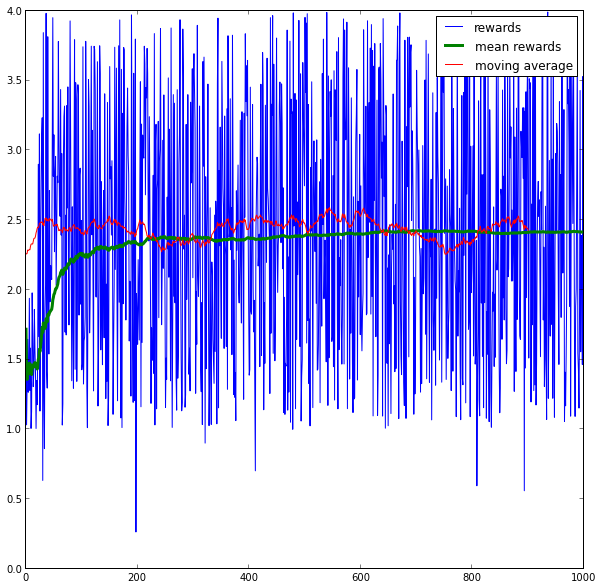

In [26]:
plt.figsize(10, 10)
from scipy.signal import convolve

def moving_average(values):
    return convolve(values, np.ones(100) / 100., mode="valid")

plt.plot(rewards, label='rewards')
plt.plot(cum_mean(rewards), linewidth=3, label='mean rewards')
from scipy.signal import convolve
plt.plot(moving_average(rewards), label='moving average')
plt.legend()

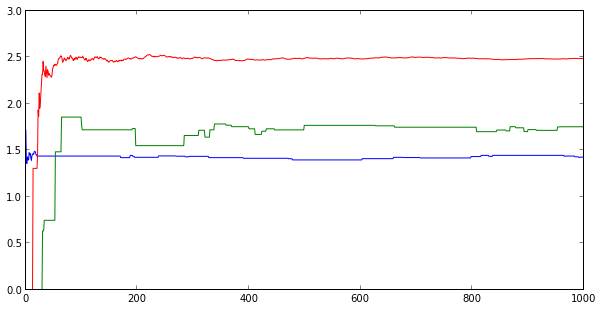

In [27]:
plt.figsize(10, 5)
Qs = np.vstack(Qs)
plt.plot(Qs[:, 0])
plt.plot(Qs[:, 1])
plt.plot(Qs[:, 2])

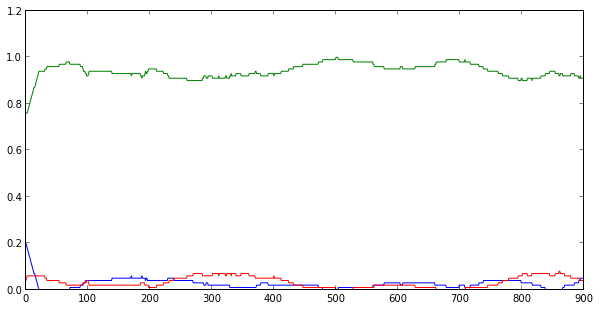

In [28]:
plt.plot(moving_average(np.array(actions) == 0), c='blue')
plt.plot(moving_average(np.array(actions) == 1), c='red')
plt.plot(moving_average(np.array(actions) == 2), c='green')

In [ ]:
Q

In [ ]:
np.bincount(actions_epsilon_greedy)

In [ ]:
Qs = np.vstack(Qs)
plt.plot(Qs[:, 0])
plt.plot(Qs[:, 1])
plt.plot(Qs[:, 2])

1.3
======

In [29]:
epsilon = 0.1
Q = np.zeros(3)
rewards, actions = [], []
Qs = np.empty((1000, 3))
for i in range(1000):
    if np.random.uniform() < epsilon:
        # sample uniformly
        action = np.random.randint(3)
    else:
        # take optimum action
        action = np.argmax(Q)
    reward = sample_reward(action)
    
    Q[action] = Q[action] + .1 * (reward - Q[action])
    Qs[i, :] = Q
    rewards.append(reward)
    actions.append(action)

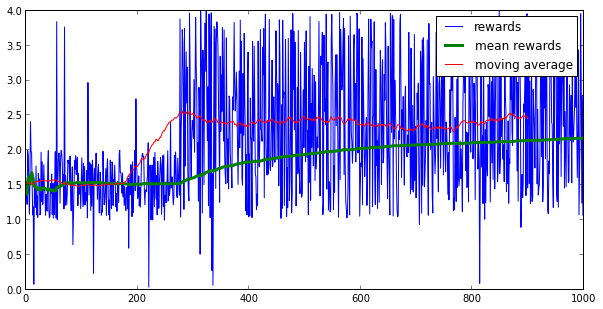

In [30]:
plt.figsize(10, 5)
plt.plot(rewards, label='rewards')
plt.plot(cum_mean(rewards), linewidth=3, label='mean rewards')
plt.plot(moving_average(rewards), label='moving average')
plt.legend()

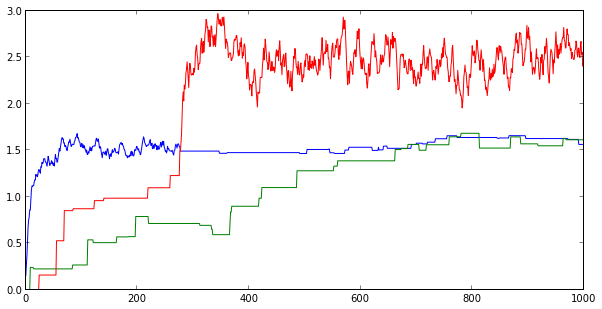

In [31]:
Qs = np.vstack(Qs)
plt.plot(Qs[:, 0])
plt.plot(Qs[:, 1])
plt.plot(Qs[:, 2])

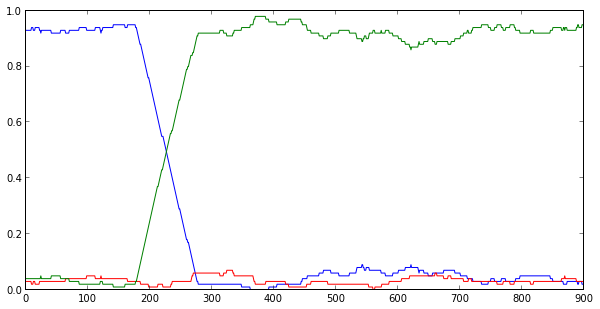

In [32]:
plt.plot(moving_average(np.array(actions) == 0), c='blue')
plt.plot(moving_average(np.array(actions) == 1), c='red')
plt.plot(moving_average(np.array(actions) == 2), c='green')

1.4
=====

In [33]:
epsilon = 0.1
Q = np.ones(3) * 5
rewards, actions = [], []
Qs = np.empty((1000, 3))
for i in range(1000):
    action = np.argmax(Q)
    reward = sample_reward(action)
    
    Q[action] = Q[action] + .1 * (reward - Q[action])
    Qs[i, :] = Q
    rewards.append(reward)
    actions.append(action)

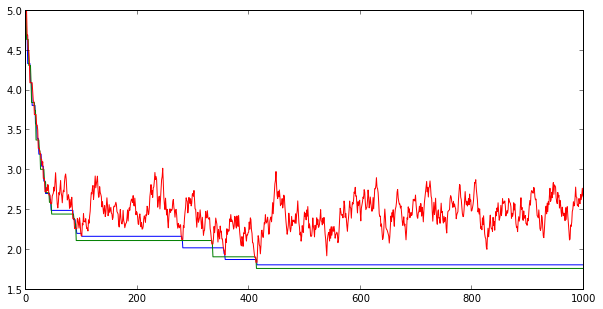

In [34]:
Qs = np.vstack(Qs)
plt.plot(Qs[:, 0])
plt.plot(Qs[:, 1])
plt.plot(Qs[:, 2])

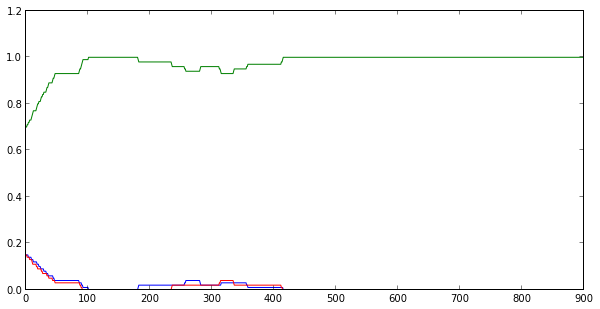

In [35]:
plt.plot(moving_average(np.array(actions) == 0), c='blue')
plt.plot(moving_average(np.array(actions) == 1), c='red')
plt.plot(moving_average(np.array(actions) == 2), c='green')